In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Crea un objeto de conexión a la base de datos SQLite
con = sqlite3.connect("Escalas.db")

# Con la conexión, crea un objeto cursor
cur = con.cursor()

In [2]:
df_salidas_tarjetas = pd.read_sql_query('SELECT COUNT(*) cantidadTarjeta, Fecha FROM accesoTarjeta GROUP BY Fecha;',con)
print(df_salidas_tarjetas.head())
print(df_salidas_tarjetas.shape)

   cantidadTarjeta       Fecha
0              176  2021-04-13
1              607  2021-04-14
2              249  2021-04-15
3              299  2021-04-16
4               72  2021-04-17
(239, 2)


In [29]:
#Creamos las etiquetas del eje x de la gráfica

from datetime import timedelta 
import datetime

etiquetas_x = []
for i in range(5,13):
    elem =  datetime.datetime(2021, i, 1)
    etiquetas_x.append(elem.strftime('%Y-%m-%d'))

salto = timedelta(1) 
dia_inicio = datetime.datetime(2021, 4, 13) 
lista_dias_datetime = [dia_inicio]
lista_dias_str = [dia_inicio.strftime('%Y-%m-%d')]
for i in range(262):
    elem = dia_inicio + salto*(i+1)
    lista_dias_datetime.append(elem)
    lista_dias_str.append(elem.strftime('%Y-%m-%d'))

for elem in etiquetas_x:
    if elem in lista_dias_str:
        print(lista_dias_str.index(elem))
    else:
        print(elem)

18
49
79
110
141
171
202
232


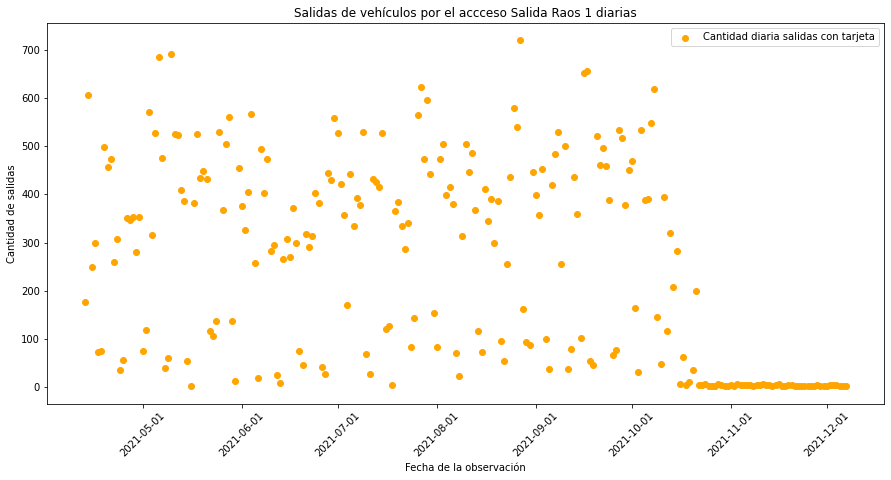

In [31]:
from datetime import timedelta 
import datetime

fig, ax = plt.subplots()

ax.scatter(df_salidas_tarjetas["Fecha"],df_salidas_tarjetas["cantidadTarjeta"],label="Cantidad diaria salidas con tarjeta", c = 'orange')
ax.set_ylabel("Cantidad de salidas")
ax.set_xlabel("Fecha de la observación")
ax.set_title("Salidas de vehículos por el accceso Salida Raos 1 diarias")
ax.set_xticks([18,49,79,110,141,171,202,232])
ax.set_xticklabels(etiquetas_x, rotation = 45)
ax.legend()

fig.set_size_inches(15, 7)
plt.show()

In [4]:
import numpy as np

medianaSalidas = np.median(df_salidas_tarjetas["cantidadTarjeta"])
print("Mediana de salidas de vehículos del puerto: ", medianaSalidas)

mediaSalidas = np.mean(df_salidas_tarjetas["cantidadTarjeta"])
print("Media de salidas de vehículos del puerto: ", mediaSalidas)

varianzaSalidas = np.var(df_salidas_tarjetas["cantidadTarjeta"])
print("Varianza de salidas de vehículos del puerto: ", varianzaSalidas)

import math
desviacionSalidas = math.sqrt(np.var(df_salidas_tarjetas["cantidadTarjeta"]))
print("Desviación de salidas de vehículos del puerto: ", desviacionSalidas)

maximoSalidas = np.max(df_salidas_tarjetas["cantidadTarjeta"])
print("Máximo de salidas de vehículos del puerto: ", maximoSalidas)

minimoSalidas = np.min(df_salidas_tarjetas["cantidadTarjeta"])
print("Mínimo de salidas de vehículos del puerto: ", minimoSalidas)

Mediana de salidas de vehículos del puerto:  283.0
Media de salidas de vehículos del puerto:  253.13807531380752
Varianza de salidas de vehículos del puerto:  43867.4746590571
Desviación de salidas de vehículos del puerto:  209.44563652427115
Máximo de salidas de vehículos del puerto:  720
Mínimo de salidas de vehículos del puerto:  1


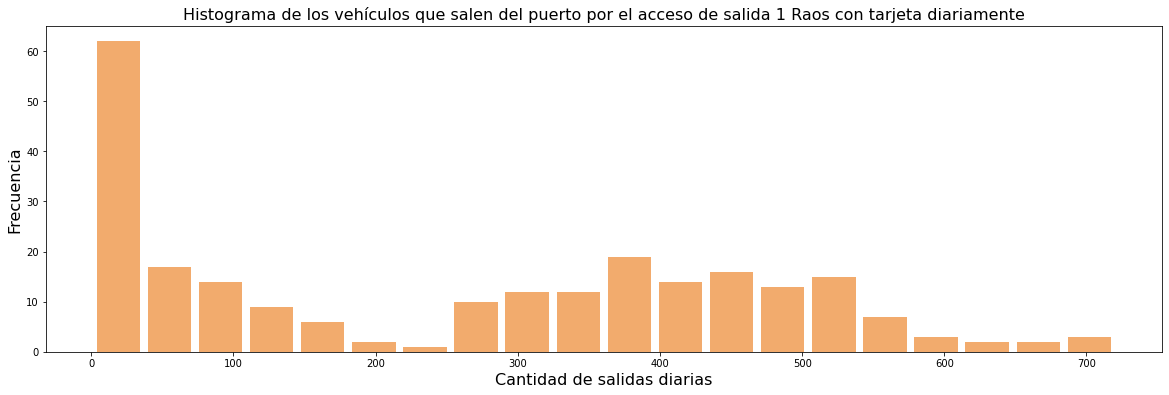

In [40]:
import matplotlib.pyplot as plot

plot.figure(figsize=(20,6))
plot.hist(x=df_salidas_tarjetas["cantidadTarjeta"], color='#F2AB6D', rwidth=0.85, bins = 20)
plot.title('Histograma de los vehículos que salen del puerto por el acceso de salida 1 Raos con tarjeta diariamente',fontsize=16)
plot.xlabel('Cantidad de salidas diarias',fontsize=16)
plot.ylabel('Frecuencia', fontsize = 16)

plot.show()

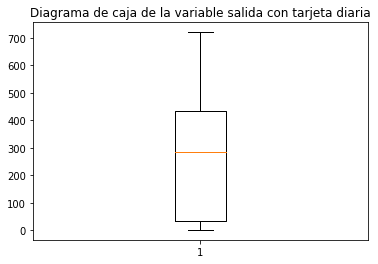

In [36]:
fig1, ax1 = plt.subplots()
ax1.set_title('Diagrama de caja de la variable salida con tarjeta diaria')
ax1.boxplot(df_salidas_tarjetas["cantidadTarjeta"])

plt.show()

**Percentiles:**

In [7]:
q4,q3,q2,q1,q0 = np. percentile(df_salidas_tarjetas["cantidadTarjeta"], [100,75,50,25,0])

In [8]:
print("Percentil 0: mínimo:", q0)
print("Percentil 1: mínimo:", q1)
print("Percentil 2: mínimo:", q2)
print("Percentil 3: mínimo:", q3)
print("Percentil 4: mínimo:", q4)
print("Rango intercuartílico:",q3-q1)

Percentil 0: mínimo: 1.0
Percentil 1: mínimo: 34.0
Percentil 2: mínimo: 283.0
Percentil 3: mínimo: 433.5
Percentil 4: mínimo: 720.0
Rango intercuartílico: 399.5


**Interpretación del boxplot:**


El 50% de los valores de las salidas de vehículos del puerto de Santander se concentran entre 34 y 433.5 aproximadamente. La mediana de esta variable es 283.0 y muestra por tanto, claramente que no es una variable simétrica (es asimétrica). En particular, la mediana se encuentra en la parte superior de la caja por lo que nuestra variable tiene una asimetría negativa. Esto quiere decir que los datos se encuenran en la parte superior de la distribución. En estos casos suele darse que la mediana es mayor que la media y efectivamente la media es 253.138 frente a 283.0 que vale la mediana.

Conclusión: en vista del boxplot podemos afirmar que la distribución de los vehículos que salen del puerto de Santander con tarjeta es una distribución con cola a la izquierda (sesgada a la izquierda) ya que la mediana es mayor que la media. 